In [1]:
import pandas as pd

In [2]:
train = pd.read_csv("loan_preds_train.csv")
test = pd.read_csv("loan_preds_test.csv")

In [3]:
train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [4]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
import seaborn as sns

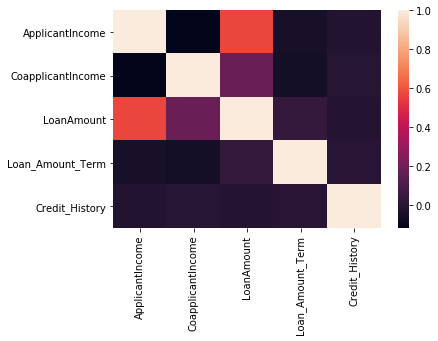

In [6]:
sns.heatmap(train.corr())

In [7]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
def barchart(feature):
    approved = train[train['Loan_Status']=='Y'][feature].value_counts()
    not_approved = train[train['Loan_Status']=='N'][feature].value_counts()
    df = pd.DataFrame([approved,not_approved])
    df.index= ['approved','not_approved']
    df.plot(kind = 'bar',stacked=True,figsize=(10,5))

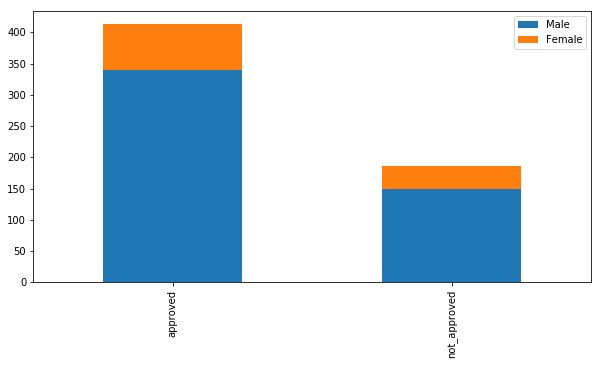

In [9]:
barchart('Gender')

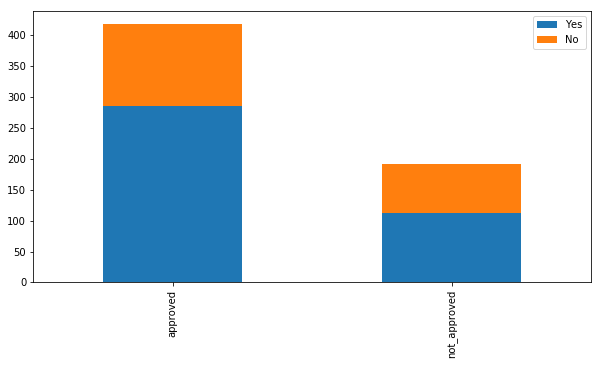

In [10]:
barchart('Married')

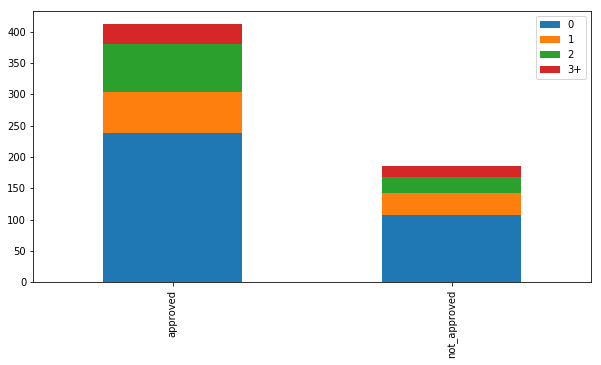

In [11]:
barchart('Dependents')

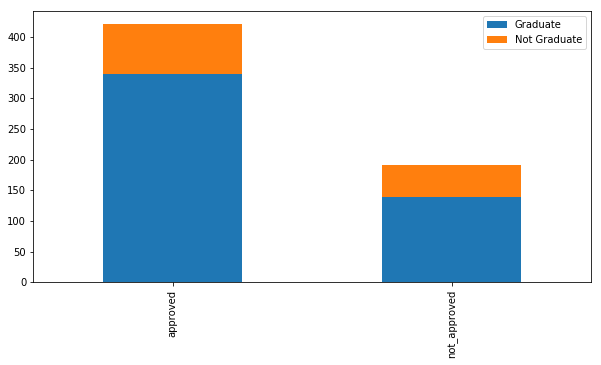

In [12]:
barchart('Education')

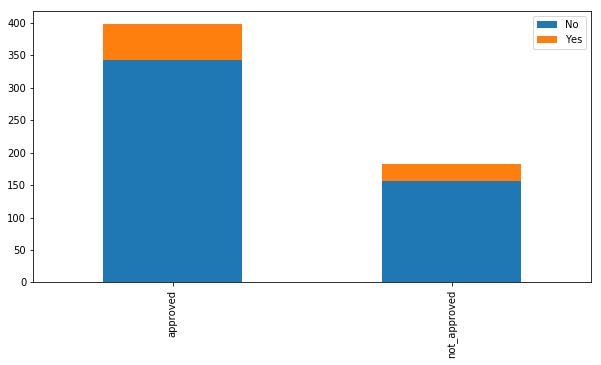

In [13]:
barchart('Self_Employed')

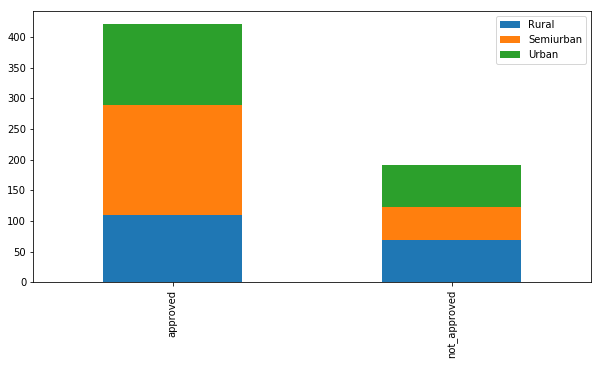

In [14]:
barchart('Property_Area')

In [15]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [16]:
train['Gender'] = train['Gender'].fillna('Male')

In [17]:
train['Gender'].value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

In [18]:
train['Married'].isnull().value_counts()

False    611
True       3
Name: Married, dtype: int64

In [19]:
train['Married'] = train['Married'].fillna('Yes')

In [20]:
train['Dependents'].isnull().sum()

15

In [21]:
test['Loan_Status'] = None

In [22]:
df = pd.concat([train,test],axis=0)

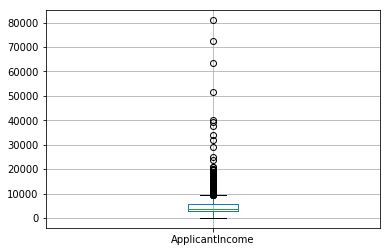

In [23]:
df.boxplot(['ApplicantIncome']);

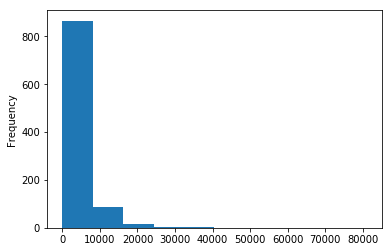

In [24]:
df['ApplicantIncome'].plot(kind='hist');

In [25]:
df['ApplicantIncome'].std()

5695.104532539108

In [26]:
df['CoapplicantIncome'].describe()

count      981.000000
mean      1601.916330
std       2718.772806
min          0.000000
25%          0.000000
50%       1110.000000
75%       2365.000000
max      41667.000000
Name: CoapplicantIncome, dtype: float64

In [27]:
df['Total_income'] = df['ApplicantIncome']+df['CoapplicantIncome']

In [28]:
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y,9613.0
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y,3849.0
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N,5540.0
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y,5532.0
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N,23809.0


In [29]:
df.isnull().sum()

Loan_ID                0
Gender                11
Married                0
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
Total_income           0
dtype: int64

In [30]:
df['Gender'].fillna('Male',inplace = True)

In [31]:
df['Married'].value_counts()

Yes    634
No     347
Name: Married, dtype: int64

In [32]:
df['Married'].fillna('Yes',inplace = True)

In [33]:
df['Dependents'].value_counts()

0     545
1     160
2     160
3+     91
Name: Dependents, dtype: int64

In [34]:
df.loc[(df.Dependents.isnull() == True) & (df.Loan_Status != -111),]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_income
102,LP001350,Male,Yes,NaN,Graduate,No,13650,0.0,NaN,360.0,1.0,Urban,Y,13650.0
104,LP001357,Male,Yes,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y,4570.0
120,LP001426,Male,Yes,NaN,Graduate,No,5667,2667.0,180.0,360.0,1.0,Rural,Y,8334.0
226,LP001754,Male,Yes,NaN,Not Graduate,Yes,4735,0.0,138.0,360.0,1.0,Urban,N,4735.0
228,LP001760,Male,Yes,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y,4758.0
293,LP001945,Female,No,NaN,Graduate,No,5417,0.0,143.0,480.0,0.0,Urban,N,5417.0
301,LP001972,Male,Yes,NaN,Not Graduate,No,2875,1750.0,105.0,360.0,1.0,Semiurban,Y,4625.0
332,LP002100,Male,No,NaN,Graduate,No,2833,0.0,71.0,360.0,1.0,Urban,Y,2833.0
335,LP002106,Male,Yes,NaN,Graduate,Yes,5503,4490.0,70.0,NaN,1.0,Semiurban,Y,9993.0
346,LP002130,Male,Yes,NaN,Not Graduate,No,3523,3230.0,152.0,360.0,0.0,Rural,N,6753.0


In [35]:
df.Dependents.fillna(2,inplace = True)

In [36]:
df.Self_Employed.value_counts()

No     807
Yes    119
Name: Self_Employed, dtype: int64

In [37]:
df.Self_Employed.fillna('Yes',inplace = True)

In [38]:
df.LoanAmount.describe()

count    954.000000
mean     142.511530
std       77.421743
min        9.000000
25%      100.000000
50%      126.000000
75%      162.000000
max      700.000000
Name: LoanAmount, dtype: float64

In [39]:
df.LoanAmount.fillna(162,inplace = True)

In [40]:
df.Loan_Amount_Term.describe()

count    961.000000
mean     342.201873
std       65.100602
min        6.000000
25%      360.000000
50%      360.000000
75%      360.000000
max      480.000000
Name: Loan_Amount_Term, dtype: float64

In [41]:
df.Loan_Amount_Term.fillna(342,inplace = True)

In [42]:
df.Credit_History.value_counts()

1.0    754
0.0    148
Name: Credit_History, dtype: int64

In [43]:
df.Credit_History.fillna(1,inplace = True)

In [44]:
df.isnull().sum()

Loan_ID                0
Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
Loan_Status          367
Total_income           0
dtype: int64

In [45]:
dicts = {'Male':1,'Female':2}

In [46]:
df.replace(dicts,axis=0,inplace=True)

C:\Users\Tutun\Anaconda3\lib\site-packages\pandas\core\generic.py:4480: UserWarning: the "axis" argument is deprecated and will be removed inv0.13; this argument has no effect
  warnings.warn('the "axis" argument is deprecated '


In [47]:
married = {'No':0,'Yes':1}
df.replace(married,axis=0,inplace = True)

C:\Users\Tutun\Anaconda3\lib\site-packages\pandas\core\generic.py:4480: UserWarning: the "axis" argument is deprecated and will be removed inv0.13; this argument has no effect
  warnings.warn('the "axis" argument is deprecated '


In [48]:
education = {'Graduate':1,'Not Graduate':0}
df.replace(education,inplace = True)

In [49]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_income
0,LP001002,1,0,0,1,0,5849,0.0,162.0,360.0,1.0,Urban,Y,5849.0
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0


In [50]:
properties = {'Urban':1,'Rural':0,'Semiurban':2}
df.replace(properties,inplace = True)

In [51]:
loan = {'Y':1,'N':0}
df.replace(loan,inplace = True)

In [52]:
new_train = df.loc[df.Loan_Status != None]

In [53]:
train_data = df.iloc[:614,:]

In [54]:
train_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
Total_income         0
dtype: int64

In [55]:
len(train_data)

614

In [56]:
test_data = df.iloc[614:,:]

In [57]:
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_income
0,LP001015,1,1,0,1,0,5720,0.0,110.0,360.0,1.0,1,NaN,5720.0
1,LP001022,1,1,1,1,0,3076,1500.0,126.0,360.0,1.0,1,NaN,4576.0
2,LP001031,1,1,2,1,0,5000,1800.0,208.0,360.0,1.0,1,NaN,6800.0
3,LP001035,1,1,2,1,0,2340,2546.0,100.0,360.0,1.0,1,NaN,4886.0
4,LP001051,1,0,0,0,0,3276,0.0,78.0,360.0,1.0,1,NaN,3276.0


In [58]:
test_data.drop('Loan_Status',inplace = True,axis = 1)

C:\Users\Tutun\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [59]:
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_income
0,LP001015,1,1,0,1,0,5720,0.0,110.0,360.0,1.0,1,5720.0
1,LP001022,1,1,1,1,0,3076,1500.0,126.0,360.0,1.0,1,4576.0
2,LP001031,1,1,2,1,0,5000,1800.0,208.0,360.0,1.0,1,6800.0
3,LP001035,1,1,2,1,0,2340,2546.0,100.0,360.0,1.0,1,4886.0
4,LP001051,1,0,0,0,0,3276,0.0,78.0,360.0,1.0,1,3276.0


In [60]:
Loan = train_data['Loan_Status']
train_data.drop('Loan_Status',axis=1,inplace = True)

C:\Users\Tutun\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [61]:
train_data['Loan_Status'] = Loan

C:\Users\Tutun\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [62]:
test_data.drop('Loan_ID',axis=1,inplace=True)


C:\Users\Tutun\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [64]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [65]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [66]:
Y_train = train_data['Loan_Status']

In [67]:
X_train = train_data.drop('Loan_Status',axis=1)

In [ ]:
from sklearn.dummy import DummyClassifier

In [ ]:
model_dummy = DummyClassifier(strategy='most_frequent', random_state=0)
# train model
model_dummy.fit(X_train, Y_train)

In [68]:
new_train = X_train.drop('Dependents',axis=1)

In [70]:
new_train = X_train.drop('Loan_ID',axis=1)

In [78]:
new_train.drop('Dependents',axis=1,inplace=True)

In [80]:
lr.fit(new_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [82]:
test_data.drop('Dependents',axis=1,inplace=True)

C:\Users\Tutun\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [121]:
preds = lr.predict(test_data)

In [122]:
dicts = {'Y':1,'N':0}
preds = pd.DataFrame(preds)


In [123]:
preds.replace({1:'Y',0:'N'},inplace=True)

In [124]:
submission['Loan_Status'] = preds

In [125]:
submission.to_csv('Loan_predictions.csv',index = False)

In [126]:
submission.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
